## Section

### Import Library

In [12]:
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout, Conv2D, AveragePooling2D, GlobalAveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, Flatten, BatchNormalization

from tensorflow.keras.optimizers import Adam

### Load Processed Data

In [2]:
preprocessed_data_dir = '/content/drive/MyDrive/Pembelajaran Mesin/Tugas Kelompok Praktikum/Preprocessing - Skenario Praktikum Modul 3/Hasil Preprocessing - Skenario Praktikum Modul 3'

x_train = np.load(preprocessed_data_dir + '/x_train.npy')
x_val = np.load(preprocessed_data_dir + '/x_val.npy')
x_test = np.load(preprocessed_data_dir + '/x_test.npy')

y_train = np.load(preprocessed_data_dir + '/y_train.npy')
y_val = np.load(preprocessed_data_dir + '/y_val.npy')
y_test = np.load(preprocessed_data_dir + '/y_test.npy')

In [3]:
print("Train Data =", x_train.shape)
print("Train Label =", y_train.shape)
print('-'*30)
print("Val Data =", x_val.shape)
print("Val Label =", y_val.shape)
print('-'*30)
print("Test Data =", x_test.shape)
print("Test Label =", y_test.shape)

Train Data = (4684, 150, 150, 3)
Train Label = (4684,)
------------------------------
Val Data = (1111, 150, 150, 3)
Val Label = (1111,)
------------------------------
Test Data = (61, 150, 150, 3)
Test Label = (61,)


### Modelling

#### Skema 1

In [4]:
# Feature Extraction Layer
model = Sequential()

model.add(Conv2D(16, (3,3), activation='relu', input_shape=[150,150,3]))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='softmax')) #1 karena normal atau bukan

# Print model summary
print(model.summary())

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 16)       0

In [5]:
train_step_size = x_train.shape[0] // 32
val_step_size = x_val.shape[0] // 32

print(train_step_size)
print(val_step_size)

146
34


In [6]:
H = model.fit(x_train, y_train,
              epochs=100,
              steps_per_epoch=train_step_size,
              validation_data=(x_val, y_val),
              validation_steps=val_step_size, 
              verbose=2
              )

Epoch 1/100
146/146 - 74s - loss: 0.5969 - acc: 0.7280 - val_loss: 0.5900 - val_acc: 0.7300 - 74s/epoch - 508ms/step
Epoch 2/100
146/146 - 72s - loss: 0.5928 - acc: 0.7305 - val_loss: 0.5832 - val_acc: 0.7300 - 72s/epoch - 495ms/step
Epoch 3/100
146/146 - 71s - loss: 0.5832 - acc: 0.7290 - val_loss: 0.5869 - val_acc: 0.7300 - 71s/epoch - 489ms/step
Epoch 4/100
146/146 - 71s - loss: 0.5748 - acc: 0.7315 - val_loss: 0.5966 - val_acc: 0.7300 - 71s/epoch - 487ms/step
Epoch 5/100
146/146 - 71s - loss: 0.5693 - acc: 0.7319 - val_loss: 0.6060 - val_acc: 0.7300 - 71s/epoch - 485ms/step
Epoch 6/100
146/146 - 71s - loss: 0.5580 - acc: 0.7280 - val_loss: 0.6231 - val_acc: 0.7300 - 71s/epoch - 485ms/step
Epoch 7/100
146/146 - 72s - loss: 0.5342 - acc: 0.7280 - val_loss: 0.6276 - val_acc: 0.7300 - 72s/epoch - 496ms/step
Epoch 8/100
146/146 - 71s - loss: 0.5023 - acc: 0.7332 - val_loss: 0.7301 - val_acc: 0.7300 - 71s/epoch - 487ms/step
Epoch 9/100
146/146 - 71s - loss: 0.4515 - acc: 0.7272 - val_los

In [7]:
import json

target_dir = '/content/drive/MyDrive/Pembelajaran Mesin/Tugas Kelompok Praktikum/Modelling - Skenario Praktikum Modul 3/Hasil Modelling - Skenario Praktikum Modul 3'

# simpan history model
history_dict = H.history
json.dump(history_dict, open(target_dir + '/epoch_100_history_model_skema_1.json', 'w'))

# simpan model dan weight-nya
model.save(target_dir + '/epoch_100_model_skema_1.h5')
model.save_weights(target_dir + '/epoch_100_model_skema_1_weights.h5')

##### Plot Loss dan Akurasi

In [8]:
import matplotlib.pyplot as plt

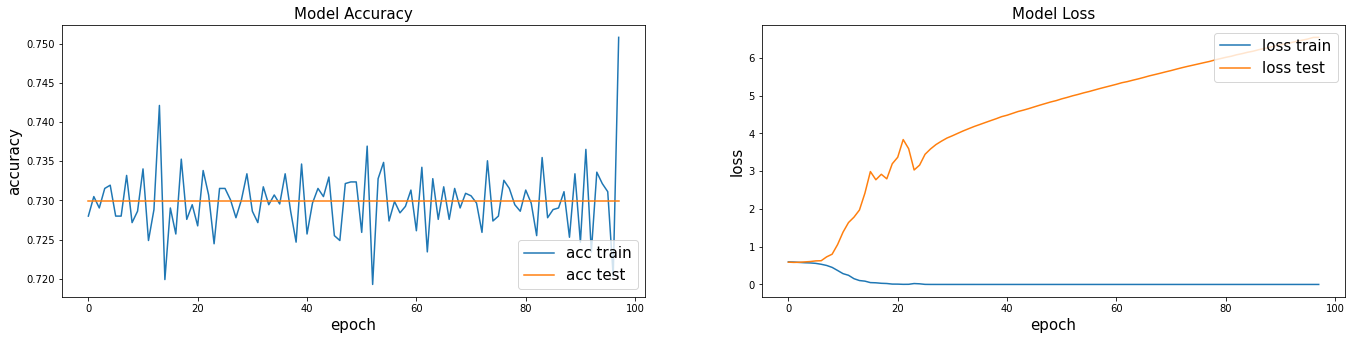

In [9]:
plt.figure(figsize = (23,5))

plt.subplot(1, 2, 1)
plt.xticks(fontsize='10')
plt.yticks(fontsize='10')
plt.plot(H.history['acc'])
plt.plot(H.history['val_acc'])
plt.title('Model Accuracy', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('epoch', fontsize=15)
plt.legend(['acc train', 'acc test'], loc='lower right', fontsize=15)

plt.subplot(1, 2, 2)
plt.xticks(fontsize='10')
plt.yticks(fontsize='10')
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('Model Loss', fontsize=15)
plt.ylabel('loss', fontsize=15)
plt.xlabel('epoch', fontsize=15)
plt.legend(['loss train', 'loss test'], loc='upper right', fontsize=15)
plt.show()

##### Classification Report

In [10]:
from sklearn.metrics import classification_report

pred = model.predict(x_val)
labels = (pred > 0.5).astype(np.int)

print('Model Skema 1')
print(classification_report(y_val, labels))

Model Skema 1
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       300
         1.0       0.73      1.00      0.84       811

    accuracy                           0.73      1111
   macro avg       0.36      0.50      0.42      1111
weighted avg       0.53      0.73      0.62      1111



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Skema 2

In [13]:
# Feature Extraction Layer
model = Sequential()

model.add(Conv2D(16, (3,3), activation='relu', input_shape=[150,150,3]))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='softmax')) #1 karena normal atau bukan

# Print model summary
print(model.summary())

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 16)        2320      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 16)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 16)        2320      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 17, 17, 16)      

In [14]:
H = model.fit(x_train, y_train,
              epochs=100,
              steps_per_epoch=train_step_size,
              validation_data=(x_val, y_val),
              validation_steps=val_step_size, 
              verbose=2
              )

Epoch 1/100
146/146 - 73s - loss: 0.6000 - acc: 0.7290 - val_loss: 0.5946 - val_acc: 0.7300 - 73s/epoch - 500ms/step
Epoch 2/100
146/146 - 72s - loss: 0.5852 - acc: 0.7319 - val_loss: 0.5972 - val_acc: 0.7300 - 72s/epoch - 491ms/step
Epoch 3/100
146/146 - 72s - loss: 0.5767 - acc: 0.7301 - val_loss: 0.5888 - val_acc: 0.7300 - 72s/epoch - 490ms/step
Epoch 4/100
146/146 - 72s - loss: 0.5586 - acc: 0.7272 - val_loss: 0.8144 - val_acc: 0.7300 - 72s/epoch - 493ms/step
Epoch 5/100
146/146 - 72s - loss: 0.5295 - acc: 0.7284 - val_loss: 0.9066 - val_acc: 0.7300 - 72s/epoch - 493ms/step
Epoch 6/100
146/146 - 72s - loss: 0.4913 - acc: 0.7334 - val_loss: 0.9756 - val_acc: 0.7300 - 72s/epoch - 491ms/step
Epoch 7/100
146/146 - 72s - loss: 0.4450 - acc: 0.7290 - val_loss: 2.0936 - val_acc: 0.7300 - 72s/epoch - 493ms/step
Epoch 8/100
146/146 - 72s - loss: 0.4107 - acc: 0.7290 - val_loss: 1.3457 - val_acc: 0.7300 - 72s/epoch - 492ms/step
Epoch 9/100
146/146 - 72s - loss: 0.3478 - acc: 0.7292 - val_los

In [15]:
import json

target_dir = '/content/drive/MyDrive/Pembelajaran Mesin/Tugas Kelompok Praktikum/Modelling - Skenario Praktikum Modul 3/Hasil Modelling - Skenario Praktikum Modul 3'

# simpan history model
history_dict = H.history
json.dump(history_dict, open(target_dir + '/epoch_20_history_model_skema_2.json', 'w'))

# simpan model dan weight-nya
model.save(target_dir + '/epoch_20_model_skema_2.h5')
model.save_weights(target_dir + '/epoch_20_model_skema_2_weights.h5')

##### Plot Loss dan Akurasi

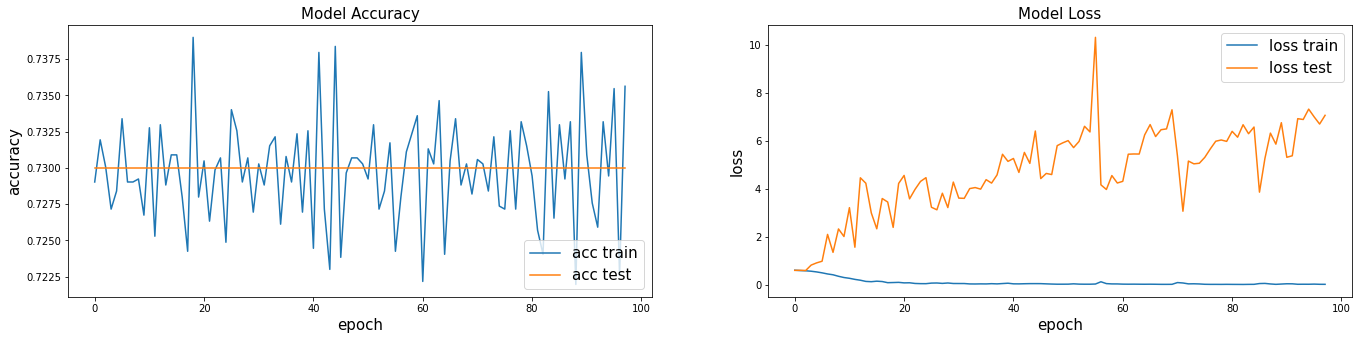

In [16]:
plt.figure(figsize = (23,5))

plt.subplot(1, 2, 1)
plt.xticks(fontsize='10')
plt.yticks(fontsize='10')
plt.plot(H.history['acc'])
plt.plot(H.history['val_acc'])
plt.title('Model Accuracy', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('epoch', fontsize=15)
plt.legend(['acc train', 'acc test'], loc='lower right', fontsize=15)

plt.subplot(1, 2, 2)
plt.xticks(fontsize='10')
plt.yticks(fontsize='10')
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('Model Loss', fontsize=15)
plt.ylabel('loss', fontsize=15)
plt.xlabel('epoch', fontsize=15)
plt.legend(['loss train', 'loss test'], loc='upper right', fontsize=15)
plt.show()

##### Classification Report

In [17]:
from sklearn.metrics import classification_report

pred = model.predict(x_val)
labels = (pred > 0.5).astype(np.int)

print('Model Skema 2')
print(classification_report(y_val, labels))

Model Skema 2
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       300
         1.0       0.73      1.00      0.84       811

    accuracy                           0.73      1111
   macro avg       0.36      0.50      0.42      1111
weighted avg       0.53      0.73      0.62      1111



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
